In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
np.set_printoptions(linewidth=np.inf)
import sympy as sp
import scipy as sc
from scipy import integrate,signal,stats,io
from sklearn.linear_model import Lasso,ridge_regression
from sklearn.utils.extmath import weighted_mode

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

import pysindy as ps

from tqdm import tqdm,tnrange

import copy

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

C:\Users\rautj\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rautj\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\rautj\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
from sindy_functions import *
from systems import *

In [4]:
sigma = 0.2  # Standard deviation.
mu = 10  # Mean.
tau = .5  # Time constant.

In [5]:
dt = .001  # Time step.
T = 5.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.
t=t[::10]

In [6]:
sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)

In [7]:
xd = np.zeros(n)

for i in range(n - 1):
    xd[i + 1] = xd[i] + dt * (-(xd[i] - mu) / tau)

xd=xd[::10]

In [8]:
ninst=1000

In [9]:
xs=np.loadtxt('1Ddatagaus.csv',delimiter=",")[:ninst]

In [10]:
mc=SINDy(polypool(xs.reshape(-1,1),1),np.gradient(xs,10*dt,axis=1).reshape(-1,1),0,reg=1e-16)
mc

array([[19.87682058],
       [-1.98582046]])

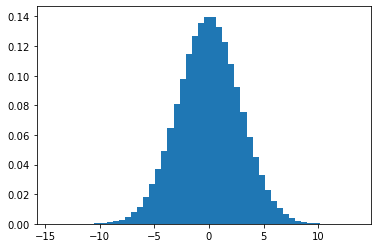

In [11]:
perr=polypool(xs.reshape(-1,1),1)@np.array([[20],[-2]])-np.gradient(xs,10*dt,axis=1).reshape(-1,1)
plt.hist(perr,bins=50,density=True)
plt.show()

In [12]:
1/np.std(perr)**2

0.12419012169303358

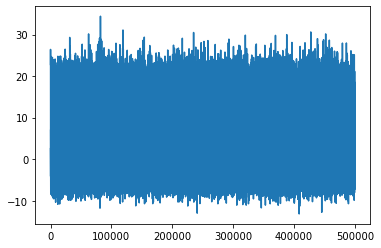

In [13]:
plt.plot(np.gradient(xs,10*dt,axis=1).reshape(-1,1))

In [36]:
ninst=10000
xs=np.loadtxt('1Ddatagaus.csv',delimiter=",")

In [ ]:
# MC and BLR CP estimates

In [37]:
deg=1
thres=0
mcs=[]
for i in tnrange(ninst):
    mc=SINDy(polypool(xs[i][:].reshape(-1,1),deg),np.gradient(xs[i][:],10*dt).reshape(-1,1),thres,reg=0).T
    mcs.append(np.copy(mc))

print(np.average(mcs,axis=0)/np.std(mcs,axis=0)/np.sqrt(500))
print()
mc,icv=SINDyCV_t(polypool(xs.reshape(-1,1),deg),np.gradient(xs,10*dt,axis=1).reshape(-1,1),thres,1e-16,1e-16,0.0,1,ptf=0.0,normalise='auto',reticv=True)
#print(mc)
#print()
print(icv)
#print()
#print(mc/icv)
#print()
#print((mc/icv).T/np.std(mcs,axis=0))

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  after removing the cwd from sys.path.


  0%|          | 0/10000 [00:00<?, ?it/s]

[[ 1.09031173 -1.00522983]]

[[ 1.53877369]
 [-1.41688567]]


In [38]:
deg=2
thres=0
mcs=[]
for i in tnrange(ninst):
    mc=SINDy(polypool(xs[i][:].reshape(-1,1),deg),np.gradient(xs[i][:],10*dt).reshape(-1,1),thres,reg=0).T
    mcs.append(np.copy(mc))

print(np.average(mcs,axis=0)/np.std(mcs,axis=0)/np.sqrt(500))
print()
mc,icv=SINDyCV_t(polypool(xs.reshape(-1,1),deg),np.gradient(xs,10*dt,axis=1).reshape(-1,1),thres,1e-16,1e-16,0.0,1,ptf=0.0,normalise='auto',reticv=True)
#print(mc)
#print()
print(icv)
#print()
#print(mc/icv)
#print()
#print((mc/icv).T/np.std(mcs,axis=0))

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  after removing the cwd from sys.path.


  0%|          | 0/10000 [00:00<?, ?it/s]

[[ 0.65240222 -0.20683513  0.0141488 ]]

[[ 0.9518673 ]
 [-0.30265568]
 [ 0.02809516]]


In [39]:
deg=3
thres=0
mcs=[]
for i in tnrange(ninst):
    mc=SINDy(polypool(xs[i][:].reshape(-1,1),deg),np.gradient(xs[i][:],10*dt).reshape(-1,1),thres,reg=0).T
    mcs.append(np.copy(mc))

print(np.average(mcs,axis=0)/np.std(mcs,axis=0)/np.sqrt(500))
print()
mc,icv=SINDyCV_t(polypool(xs.reshape(-1,1),deg),np.gradient(xs,10*dt,axis=1).reshape(-1,1),thres,1e-16,1e-16,0.0,1,ptf=0.0,normalise='auto',reticv=True)
#print(mc)
#print()
print(icv)
#print()
#print(mc/icv)
#print()
#print((mc/icv).T/np.std(mcs,axis=0))

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  after removing the cwd from sys.path.


  0%|          | 0/10000 [00:00<?, ?it/s]

[[ 0.45509097 -0.05390404 -0.02046103  0.02314089]]

[[ 0.67013929]
 [-0.06813617]
 [-0.04172269]
 [ 0.04635888]]


In [40]:
deg=4
thres=0
mcs=[]
for i in tnrange(ninst):
    mc=SINDy(polypool(xs[i][:].reshape(-1,1),deg),np.gradient(xs[i][:],10*dt).reshape(-1,1),thres,reg=0).T
    mcs.append(np.copy(mc))

print(np.average(mcs,axis=0)/np.std(mcs,axis=0)/np.sqrt(500))
print()
mc,icv=SINDyCV_t(polypool(xs.reshape(-1,1),deg),np.gradient(xs,10*dt,axis=1).reshape(-1,1),thres,1e-16,1e-16,0.0,1,ptf=0.0,normalise='auto',reticv=True)
#print(mc)
#print()
print(icv)
#print()
#print(mc/icv)
#print()
#print((mc/icv).T/np.std(mcs,axis=0))

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  after removing the cwd from sys.path.


  0%|          | 0/10000 [00:00<?, ?it/s]

[[ 0.36787904 -0.04696259  0.01898618 -0.02309094  0.026404  ]]

[[ 0.57069935]
 [-0.07460048]
 [ 0.0345072 ]
 [-0.04179719]
 [ 0.04751841]]


In [41]:
deg=5
thres=0
mcs=[]
for i in tnrange(ninst):
    mc=SINDy(polypool(xs[i][:].reshape(-1,1),deg),np.gradient(xs[i][:],10*dt).reshape(-1,1),thres,reg=0).T
    mcs.append(np.copy(mc))

print(np.average(mcs,axis=0)/np.std(mcs,axis=0)/np.sqrt(500))
print()
mc,icv=SINDyCV_t(polypool(xs.reshape(-1,1),deg),np.gradient(xs,10*dt,axis=1).reshape(-1,1),thres,1e-16,1e-16,0.0,1,ptf=0.0,normalise='auto',reticv=True)
#print(mc)
#print()
print(icv)
#print()
#print(mc/icv)
#print()
#print((mc/icv).T/np.std(mcs,axis=0))

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  after removing the cwd from sys.path.


  0%|          | 0/10000 [00:00<?, ?it/s]

[[ 0.29888375 -0.0058113  -0.01740911  0.02139904 -0.02496605  0.02819691]]

[[ 0.46529881]
 [-0.00407574]
 [-0.03064043]
 [ 0.03638815]
 [-0.04157632]
 [ 0.04627508]]


In [80]:
deg=5
thres=0.01
mcs=[]
for i in tnrange(ninst):
    mc=SINDy(polypool(xs[i][:].reshape(-1,1),deg),np.gradient(xs[i][:],10*dt).reshape(-1,1),thres,reg=0).T
    mcs.append(np.copy(mc))

print(np.average(mcs,axis=0)/np.std(mcs,axis=0)/np.sqrt(500))
print()
mc,icv=SINDyCV_t(polypool(xs.reshape(-1,1),deg),np.gradient(xs,10*dt,axis=1).reshape(-1,1),thres,1e-16,1e-16,0.0,1,ptf=0.0,normalise='auto',reticv=True)
#print(mc)
#print()
print(icv)
#print()
#print(mc/icv)
#print()
#print((mc/icv).T/np.std(mcs,axis=0))

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  after removing the cwd from sys.path.


  0%|          | 0/10000 [00:00<?, ?it/s]

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


[[ 0.42226532 -0.04542438  0.00155318 -0.00569178  0.00956884         nan]]

[[ 0.9518673 ]
 [-0.30265568]
 [ 0.02809516]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]


In [78]:
deg=5
thres=0
mcs=[]
for i in tnrange(ninst):
    mc=SINDy(polypool(xs[i][:].reshape(-1,1),deg),np.gradient(xs[i][:],10*dt).reshape(-1,1),thres,reg=0.05).T
    mcs.append(np.copy(mc))

print(np.average(mcs,axis=0)/np.std(mcs,axis=0)/np.sqrt(500))
print()
mc,icv=SINDyCV_t(polypool(xs.reshape(-1,1),deg),np.gradient(xs,10*dt,axis=1).reshape(-1,1),thres,10,10,0.0,1,ptf=0.0,normalise='auto',reticv=True)
#print(mc)
#print()
print(icv)
#print()
#print(mc/icv)
#print()
#print((mc/icv).T/np.std(mcs,axis=0))

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  after removing the cwd from sys.path.


  0%|          | 0/10000 [00:00<?, ?it/s]

[[ 0.65711288 -0.13234478 -0.0636539  -0.02667597  0.01013698  0.04311043]]

[[ 0.47913783]
 [-0.03170438]
 [ 0.00345953]
 [-0.00117779]
 [-0.00206294]
 [ 0.00566721]]


In [140]:
(1+1e-5)-1

1.0000000000065512e-05

In [45]:
#SINDy?

In [54]:
#SINDyCV_t?

In [83]:
ps.STLSQ?

In [84]:
thres=0.0
deg=1
model = ps.SINDy(feature_names=["x"],optimizer=ps.STLSQ(threshold=thres,normalize_columns=True),feature_library=ps.PolynomialLibrary(degree=deg))
mcs=[]
for i in tnrange(ninst):
    model.fit(xs[i][:], t=t[:])
    mc=model.coefficients()
    mcs.append(np.copy(mc))

np.average(mcs,axis=0)/np.std(mcs,axis=0)

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  """


  0%|          | 0/10000 [00:00<?, ?it/s]

array([[ 23.85758601, -22.01392848]])

In [85]:
np.average(mcs,axis=0),np.std(mcs,axis=0)

(array([[19.91642167, -1.99059222]]), array([[0.83480456, 0.09042422]]))

In [86]:
model.coefficients()[:,:]=np.average(mcs,axis=0)
model.print()

(x)' = 19.916 1 + -1.991 x


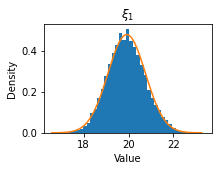

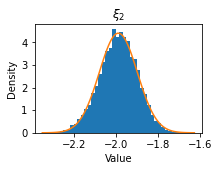

In [87]:
for i in range(deg+1):
    plt.figure(figsize=(3,2))
    plt.title('$\\xi_'+str(i+1)+'$')
    plt.hist(np.array(mcs)[:,0,:][:,i],bins=40,density=True)
    mu=np.average(mcs,axis=0)[0,i]
    sig=np.std(mcs,axis=0)[0,i]
    xpdf=np.linspace(mu-4*sig,mu+4*sig,100)
    plt.plot(xpdf,sc.stats.norm.pdf(xpdf,mu,sig))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [88]:
mcs=[]
for i in tnrange(ninst):
    mc=SINDy(polypool(xs[i][:].reshape(-1,1),deg),np.gradient(xs[i][:],10*dt).reshape(-1,1),thres,reg=0).T
    mcs.append(np.copy(mc))

np.average(mcs,axis=0)/np.std(mcs,axis=0)

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  


  0%|          | 0/10000 [00:00<?, ?it/s]

array([[ 24.38011151, -22.4776223 ]])

In [89]:
np.average(mcs,axis=0),np.std(mcs,axis=0)

(array([[19.91159813, -1.99006535]]), array([[0.81671481, 0.0885354 ]]))

In [90]:
model.coefficients()[:,:]=np.average(mcs,axis=0)
model.print()

(x)' = 19.912 1 + -1.990 x


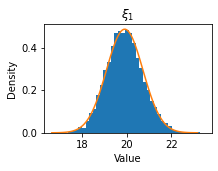

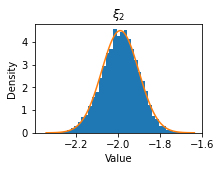

In [91]:
for i in range(deg+1):
    plt.figure(figsize=(3,2))
    plt.title('$\\xi_'+str(i+1)+'$')
    plt.hist(np.array(mcs)[:,0,:][:,i],bins=40,density=True)
    mu=np.average(mcs,axis=0)[0,i]
    sig=np.std(mcs,axis=0)[0,i]
    xpdf=np.linspace(mu-4*sig,mu+4*sig,100)
    plt.plot(xpdf,sc.stats.norm.pdf(xpdf,mu,sig))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [92]:
mcs=[]
for i in tnrange(ninst):
    mc=SINDyL1(xs[i][:].reshape(-1,1),polypool(xs[i][:].reshape(-1,1),deg),np.gradient(xs[i][:],10*dt).reshape(-1,1),thres,copy.deepcopy(model),reg=0).T
    mcs.append(np.copy(mc))

np.average(mcs,axis=0)/np.std(mcs,axis=0)

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  


  0%|          | 0/10000 [00:00<?, ?it/s]

array([[ 21.32738995, -19.63140705]])

In [93]:
np.average(mcs,axis=0)

array([[19.91294507, -1.99006192]])

In [94]:
model.coefficients()[:,:]=np.average(mcs,axis=0)
model.print()

(x)' = 19.913 1 + -1.990 x


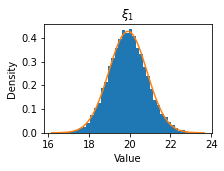

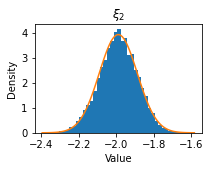

In [95]:
for i in range(deg+1):
    plt.figure(figsize=(3,2))
    plt.title('$\\xi_'+str(i+1)+'$')
    plt.hist(np.array(mcs)[:,0,:][:,i],bins=40,density=True)
    mu=np.average(mcs,axis=0)[0,i]
    sig=np.std(mcs,axis=0)[0,i]
    xpdf=np.linspace(mu-4*sig,mu+4*sig,100)
    plt.plot(xpdf,sc.stats.norm.pdf(xpdf,mu,sig))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [96]:
thres=0.0
deg=2
model = ps.SINDy(feature_names=["x"],optimizer=ps.STLSQ(threshold=thres,normalize_columns=True),feature_library=ps.PolynomialLibrary(degree=deg))
mcs=[]
for i in tnrange(ninst):
    model.fit(xs[i][:], t=t[:])
    mc=model.coefficients()
    mcs.append(np.copy(mc))

np.average(mcs,axis=0)/np.std(mcs,axis=0)

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  """


  0%|          | 0/10000 [00:00<?, ?it/s]

array([[13.8239056 , -4.43283887,  0.31932418]])

In [97]:
np.average(mcs,axis=0)

array([[ 2.03037800e+01, -2.14231064e+00,  1.15135835e-02]])

In [98]:
model.coefficients()[:,:]=np.average(mcs,axis=0)
model.print()

(x)' = 20.304 1 + -2.142 x + 0.012 x^2


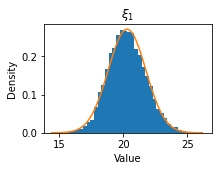

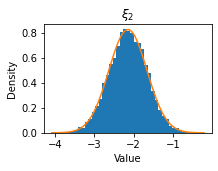

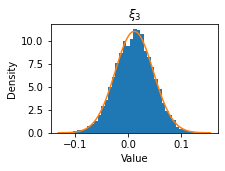

In [99]:
for i in range(deg+1):
    plt.figure(figsize=(3,2))
    plt.title('$\\xi_'+str(i+1)+'$')
    plt.hist(np.array(mcs)[:,0,:][:,i],bins=40,density=True)
    mu=np.average(mcs,axis=0)[0,i]
    sig=np.std(mcs,axis=0)[0,i]
    xpdf=np.linspace(mu-4*sig,mu+4*sig,100)
    plt.plot(xpdf,sc.stats.norm.pdf(xpdf,mu,sig))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [100]:
mcs=[]
for i in tnrange(ninst):
    mc=SINDy(polypool(xs[i][:].reshape(-1,1),deg),np.gradient(xs[i][:],10*dt).reshape(-1,1),thres,reg=0).T
    mcs.append(np.copy(mc))

np.average(mcs,axis=0)/np.std(mcs,axis=0)

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  


  0%|          | 0/10000 [00:00<?, ?it/s]

array([[14.58815708, -4.62497408,  0.31637684]])

In [101]:
np.average(mcs,axis=0)

array([[ 2.02827028e+01, -2.13502394e+00,  1.09893066e-02]])

In [102]:
model.coefficients()[:,:]=np.average(mcs,axis=0)
model.print()

(x)' = 20.283 1 + -2.135 x + 0.011 x^2


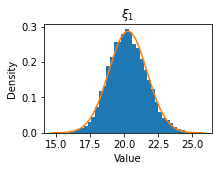

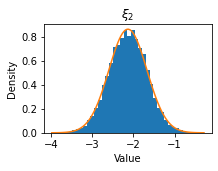

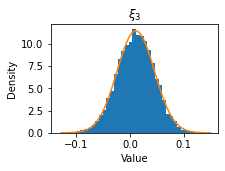

In [103]:
for i in range(deg+1):
    plt.figure(figsize=(3,2))
    plt.title('$\\xi_'+str(i+1)+'$')
    plt.hist(np.array(mcs)[:,0,:][:,i],bins=40,density=True)
    mu=np.average(mcs,axis=0)[0,i]
    sig=np.std(mcs,axis=0)[0,i]
    xpdf=np.linspace(mu-4*sig,mu+4*sig,100)
    plt.plot(xpdf,sc.stats.norm.pdf(xpdf,mu,sig))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [104]:
mcs=[]
for i in tnrange(ninst):
    mc=SINDyL1(xs[i][:].reshape(-1,1),polypool(xs[i][:].reshape(-1,1),deg),np.gradient(xs[i][:],10*dt).reshape(-1,1),thres,copy.deepcopy(model),reg=0).T
    mcs.append(np.copy(mc))

np.average(mcs,axis=0)/np.std(mcs,axis=0)

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  


  0%|          | 0/10000 [00:00<?, ?it/s]

array([[12.92104237, -4.09172373,  0.28199716]])

In [105]:
np.average(mcs,axis=0)

array([[ 2.02884564e+01, -2.13661605e+00,  1.11050898e-02]])

In [106]:
model.coefficients()[:,:]=np.average(mcs,axis=0)
model.print()

(x)' = 20.288 1 + -2.137 x + 0.011 x^2


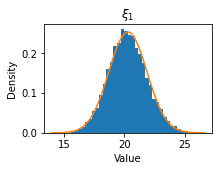

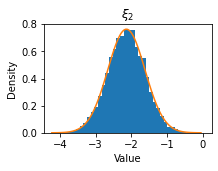

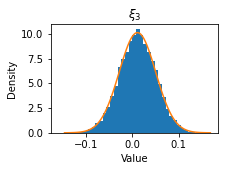

In [107]:
for i in range(deg+1):
    plt.figure(figsize=(3,2))
    plt.title('$\\xi_'+str(i+1)+'$')
    plt.hist(np.array(mcs)[:,0,:][:,i],bins=40,density=True)
    mu=np.average(mcs,axis=0)[0,i]
    sig=np.std(mcs,axis=0)[0,i]
    xpdf=np.linspace(mu-4*sig,mu+4*sig,100)
    plt.plot(xpdf,sc.stats.norm.pdf(xpdf,mu,sig))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [108]:
thres=0.0
deg=3
model = ps.SINDy(feature_names=["x"],optimizer=ps.STLSQ(threshold=thres,normalize_columns=True),feature_library=ps.PolynomialLibrary(degree=deg))
mcs=[]
for i in tnrange(ninst):
    model.fit(xs[i][:], t=t[:])
    mc=model.coefficients()
    mcs.append(np.copy(mc))

np.average(mcs,axis=0)/np.std(mcs,axis=0)

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  """


  0%|          | 0/10000 [00:00<?, ?it/s]

array([[ 9.24606073, -1.1305251 , -0.40827901,  0.47013731]])

In [109]:
np.average(mcs,axis=0)

array([[ 1.97077988e+01, -1.57167055e+00, -1.03910073e-01,  6.45709344e-03]])

In [110]:
model.coefficients()[:,:]=np.average(mcs,axis=0)
model.print()

(x)' = 19.708 1 + -1.572 x + -0.104 x^2 + 0.006 x^3


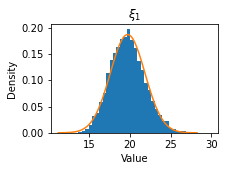

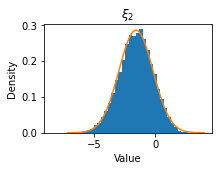

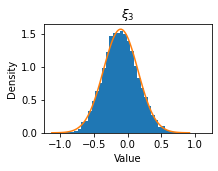

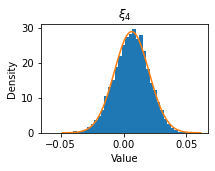

In [111]:
for i in range(deg+1):
    plt.figure(figsize=(3,2))
    plt.title('$\\xi_'+str(i+1)+'$')
    plt.hist(np.array(mcs)[:,0,:][:,i],bins=40,density=True)
    mu=np.average(mcs,axis=0)[0,i]
    sig=np.std(mcs,axis=0)[0,i]
    xpdf=np.linspace(mu-4*sig,mu+4*sig,100)
    plt.plot(xpdf,sc.stats.norm.pdf(xpdf,mu,sig))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [112]:
mcs=[]
for i in tnrange(ninst):
    mc=SINDy(polypool(xs[i][:].reshape(-1,1),deg),np.gradient(xs[i][:],10*dt).reshape(-1,1),thres,reg=0).T
    mcs.append(np.copy(mc))

np.average(mcs,axis=0)/np.std(mcs,axis=0)

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  


  0%|          | 0/10000 [00:00<?, ?it/s]

array([[10.17614339, -1.20533096, -0.45752258,  0.51744596]])

In [113]:
np.average(mcs,axis=0)

array([[ 1.96631983e+01, -1.54294215e+00, -1.08750527e-01,  6.69882977e-03]])

In [114]:
model.coefficients()[:,:]=np.average(mcs,axis=0)
model.print()

(x)' = 19.663 1 + -1.543 x + -0.109 x^2 + 0.007 x^3


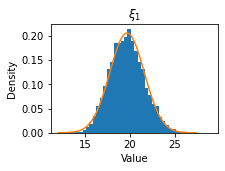

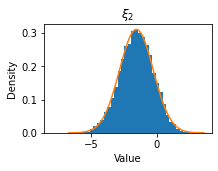

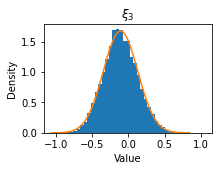

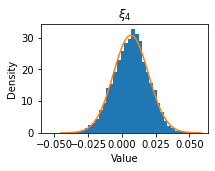

In [115]:
for i in range(deg+1):
    plt.figure(figsize=(3,2))
    plt.title('$\\xi_'+str(i+1)+'$')
    plt.hist(np.array(mcs)[:,0,:][:,i],bins=40,density=True)
    mu=np.average(mcs,axis=0)[0,i]
    sig=np.std(mcs,axis=0)[0,i]
    xpdf=np.linspace(mu-4*sig,mu+4*sig,100)
    plt.plot(xpdf,sc.stats.norm.pdf(xpdf,mu,sig))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [116]:
mcs=[]
for i in tnrange(ninst):
    mc=SINDyL1(xs[i][:].reshape(-1,1),polypool(xs[i][:].reshape(-1,1),deg),np.gradient(xs[i][:],10*dt).reshape(-1,1),thres,copy.deepcopy(model),reg=0).T
    mcs.append(np.copy(mc))

np.average(mcs,axis=0)/np.std(mcs,axis=0)

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  


  0%|          | 0/10000 [00:00<?, ?it/s]

array([[ 9.3328576 , -1.11683719, -0.41575024,  0.46739814]])

In [117]:
np.average(mcs,axis=0)

array([[ 1.96647020e+01, -1.54770356e+00, -1.07574903e-01,  6.62925914e-03]])

In [118]:
model.coefficients()[:,:]=np.average(mcs,axis=0)
model.print()

(x)' = 19.665 1 + -1.548 x + -0.108 x^2 + 0.007 x^3


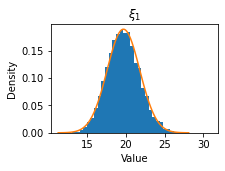

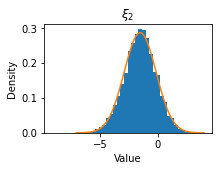

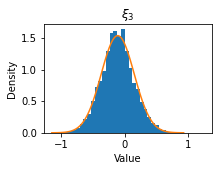

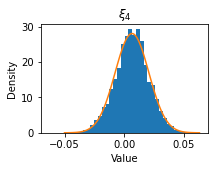

In [119]:
for i in range(deg+1):
    plt.figure(figsize=(3,2))
    plt.title('$\\xi_'+str(i+1)+'$')
    plt.hist(np.array(mcs)[:,0,:][:,i],bins=40,density=True)
    mu=np.average(mcs,axis=0)[0,i]
    sig=np.std(mcs,axis=0)[0,i]
    xpdf=np.linspace(mu-4*sig,mu+4*sig,100)
    plt.plot(xpdf,sc.stats.norm.pdf(xpdf,mu,sig))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [120]:
#maybe re demo effect with an instance of overfit model as og model

In [121]:
thres=0.0
deg=5
model = ps.SINDy(feature_names=["x"],optimizer=ps.STLSQ(threshold=thres,normalize_columns=True),feature_library=ps.PolynomialLibrary(degree=deg))
mcs=[]
for i in tnrange(ninst):
    model.fit(xs[i][:], t=t[:])
    mc=model.coefficients()
    mcs.append(np.copy(mc))

np.average(mcs,axis=0)/np.std(mcs,axis=0)

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  """


  0%|          | 0/10000 [00:00<?, ?it/s]

array([[ 5.55674794, -0.14224591, -0.31098624,  0.39931644, -0.47873654,  0.55080907]])

In [122]:
np.average(mcs,axis=0)

array([[ 1.98022987e+01, -8.12906503e-01, -8.93431679e-01,  2.42254505e-01, -2.72040163e-02,  1.07536799e-03]])

In [123]:
np.std(mcs,axis=0)

array([[3.56364890e+00, 5.71479692e+00, 2.87289778e+00, 6.06673009e-01, 5.68246087e-02, 1.95234256e-03]])

In [124]:
model.coefficients()[:,:]=np.average(mcs,axis=0)
model.print()

(x)' = 19.802 1 + -0.813 x + -0.893 x^2 + 0.242 x^3 + -0.027 x^4 + 0.001 x^5


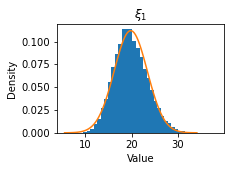

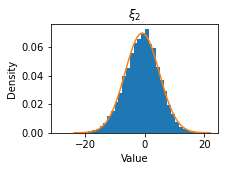

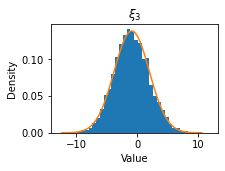

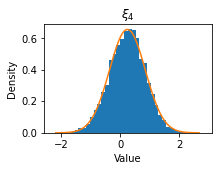

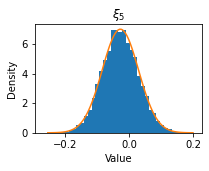

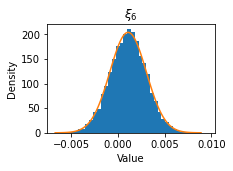

In [125]:
for i in range(deg+1):
    plt.figure(figsize=(3,2))
    plt.title('$\\xi_'+str(i+1)+'$')
    plt.hist(np.array(mcs)[:,0,:][:,i],bins=40,density=True)
    mu=np.average(mcs,axis=0)[0,i]
    sig=np.std(mcs,axis=0)[0,i]
    xpdf=np.linspace(mu-4*sig,mu+4*sig,100)
    plt.plot(xpdf,sc.stats.norm.pdf(xpdf,mu,sig))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [126]:
mcs=[]
for i in tnrange(ninst):
    mc=SINDy(polypool(xs[i][:].reshape(-1,1),deg),np.gradient(xs[i][:],10*dt).reshape(-1,1),thres,reg=0.01).T
    mcs.append(np.copy(mc))

np.average(mcs,axis=0)/np.std(mcs,axis=0)

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  


  0%|          | 0/10000 [00:00<?, ?it/s]

array([[12.49188073, -2.2783465 , -0.14370113, -0.47161814, -0.43017641,  0.8192429 ]])

In [127]:
np.average(mcs,axis=0)

array([[ 1.96398140e+01, -1.73974330e+00, -1.52946472e-02, -2.91408248e-03, -2.62578765e-04,  4.89638135e-05]])

In [128]:
np.std(mcs,axis=0)

array([[1.57220634e+00, 7.63599086e-01, 1.06433730e-01, 6.17890249e-03, 6.10397872e-04, 5.97671504e-05]])

In [129]:
model.coefficients()[:,:]=np.average(mcs,axis=0)
model.print()

(x)' = 19.640 1 + -1.740 x + -0.015 x^2 + -0.003 x^3


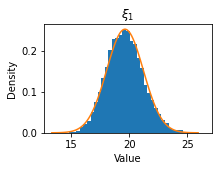

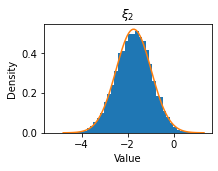

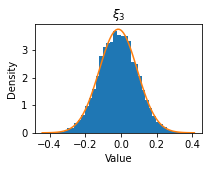

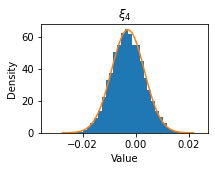

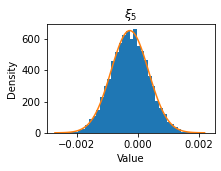

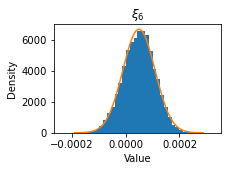

In [130]:
for i in range(deg+1):
    plt.figure(figsize=(3,2))
    plt.title('$\\xi_'+str(i+1)+'$')
    plt.hist(np.array(mcs)[:,0,:][:,i],bins=40,density=True)
    mu=np.average(mcs,axis=0)[0,i]
    sig=np.std(mcs,axis=0)[0,i]
    xpdf=np.linspace(mu-4*sig,mu+4*sig,100)
    plt.plot(xpdf,sc.stats.norm.pdf(xpdf,mu,sig))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [131]:
[ 8.05011372, -1.00472092, -0.36979479,  0.43113216]

[8.05011372, -1.00472092, -0.36979479, 0.43113216]

In [132]:
stax=xs[0][:]
staxdot=np.gradient(xs[0,:],10*dt)
#stat=t[:]
for i in tnrange(1,ninst):
    stax=np.hstack((stax,xs[i][:]))
    staxdot=np.hstack((staxdot,np.gradient(xs[i,:],10*dt)))
    #stat=np.hstack((stat,t[:]))

C:\Users\rautj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  after removing the cwd from sys.path.


  0%|          | 0/9999 [00:00<?, ?it/s]

In [133]:
thres=0.0
deg=3
model = ps.SINDy(feature_names=["x"],optimizer=ps.STLSQ(threshold=thres,normalize_columns=True),feature_library=ps.PolynomialLibrary(degree=deg))
model.fit(stax,t=np.arange(len(stax)),x_dot=staxdot)
model.print()

(x)' = 19.416 1 + -1.336 x + -0.155 x^2 + 0.010 x^3


In [134]:
model.coefficients()[:,:]=SINDy(polypool(stax.reshape(-1,1),deg),staxdot.reshape(-1,1),thres,reg=0.0).T
model.print()

(x)' = 19.416 1 + -1.336 x + -0.155 x^2 + 0.010 x^3


In [135]:
sigsq=np.sum((model.predict(stax.reshape(-1,1))-staxdot.reshape(-1,1))**2)/len(stax)
covinv=np.linalg.inv((polypool(xs[0][:].reshape(-1,1),deg).T@polypool(xs[0][:].reshape(-1,1),deg)))
#covinv=(polypool(xs[0][:].reshape(-1,1),deg).T@polypool(xs[0][:].reshape(-1,1),deg))
cov=sigsq*covinv
model.coefficients()[0]/np.sqrt(np.diag(cov))

array([14.39421273, -1.45597618, -0.89951777,  1.01021316])

In [136]:
covinv=(polypool(xs[0][:].reshape(-1,1),deg).T@polypool(xs[0][:].reshape(-1,1),deg))
cov=(1/sigsq)*covinv
model.coefficients()[0]/np.sqrt(np.diag(cov))

array([ 2.46076972e+00, -1.83721474e-02, -2.20840617e-04,  1.38597256e-06])